In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import astropy.io.fits as pyfits

## Load in the 3C 454.3 weekly binned lightcuve

In [3]:
lc = pyfits.open('3C454.3_604800.lc')

In [4]:
plt.errorbar(lc[1].data['START'],
         lc[1].data['FLUX_100_300000'], 
         yerr=lc[1].data['ERROR_100_300000'], fmt='.')
plt.show()

## Define Fractional Variability

$F_{var} = \sqrt{\frac{S^2 - \overline{\sigma_{err}^2}}{\bar{x}^2}}$

$err(F_{var}) = \sqrt{\left(\sqrt{\frac{1}{2N}}\frac{\overline{\sigma_{err}^2}}{\bar{x}^2 F_{var}}\right)^2 +\left(\sqrt{\frac{\overline{\sigma_{err}^2}}{N}}\frac{1}{\bar{x}}\right)^2}$

In [5]:
def F_var(data,error):
    
    N = len(data)
    sigma2 = np.mean(error**2)
    mean = np.mean(data)
        
    Fvar = np.sqrt((np.var(data) - sigma2) / mean**2)
    FvarErr = np.sqrt(((sigma2/(Fvar*mean**2))**2)/(2*N) + (np.sqrt(sigma2/N) / mean)**2)
    
    return Fvar, FvarErr


### Fractional Variability of the light curve 

In [6]:
len(lc[1].data['FLUX_100_300000'])

452

In [7]:
trueFvar = F_var(lc[1].data['FLUX_100_300000'][225:],lc[1].data['ERROR_100_300000'][225:])
print(trueFvar)

(0.7729013848170629, 0.00487268649447318)


In [8]:
trueFvar = F_var(lc[1].data['FLUX_100_300000'][:225],lc[1].data['ERROR_100_300000'][:225])

In [9]:
trueFvar

(1.7233620841645336, 0.0042571873671207825)

In [10]:
trueFvar = F_var(lc[1].data['FLUX_100_300000'],lc[1].data['ERROR_100_300000'])

In [11]:
trueFvar

(1.5011472615307737, 0.0032053829007730387)

### Randomly pick 25% of the bins and calculate the F_var

In [12]:
mask = np.random.choice([False, True], len(lc[1].data['FLUX_100_300000']), p=[0.75, 0.25]) 

In [13]:
F_var(lc[1].data['FLUX_100_300000'][mask],lc[1].data['ERROR_100_300000'][mask])

(2.0358462854422283, 0.006349484845358493)

### Randomly pick 75% of the data.  Run this 5000 times

In [14]:
masks = [np.random.choice([False, True], len(lc[1].data['FLUX_100_300000']), p=[0.25, 0.75]) for N in np.arange(5000)]

In [15]:
Fvars = np.array([(F_var(lc[1].data['FLUX_100_300000'][mask],lc[1].data['ERROR_100_300000'][mask])) for mask in masks])

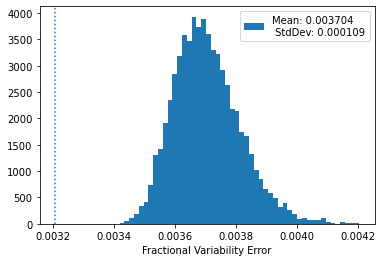

In [17]:
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,0].mean(),Fvars[:,0].std())
H = plt.hist(Fvars[:,0],bins=50, density=True, label=txt)
plt.xlabel('Fractional Variability')
plt.axvline(trueFvar[0], ls=":")
plt.legend()
plt.show()
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,1].mean(),Fvars[:,1].std())
plt.hist(Fvars[:,1],bins=50, density=True, label=txt)
plt.axvline(trueFvar[1], ls=":")
plt.legend()
plt.xlabel('Fractional Variability Error')
plt.show()

### Same thing but only pick 25% of the data points

In [18]:
masks = [np.random.choice([False, True], len(lc[1].data['FLUX_100_300000']), p=[0.75, 0.25]) for N in np.arange(5000)]
Fvars = np.array([(F_var(lc[1].data['FLUX_100_300000'][mask],lc[1].data['ERROR_100_300000'][mask])) for mask in masks])

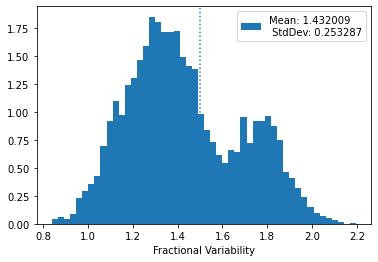

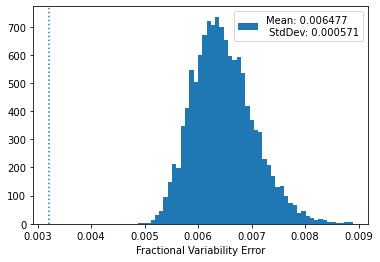

In [19]:
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,0].mean(),Fvars[:,0].std())
H = plt.hist(Fvars[:,0],bins=50, density=True, label=txt)
plt.xlabel('Fractional Variability')
plt.axvline(trueFvar[0], ls=":")
plt.legend()
plt.show()
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,1].mean(),Fvars[:,1].std())
plt.hist(Fvars[:,1],bins=50, density=True, label=txt)
plt.axvline(trueFvar[1], ls=":")
plt.legend()
plt.xlabel('Fractional Variability Error')
plt.show()

### Let's try a different light curve (PKS 2155)

In [20]:
lc = pyfits.open('PKS2155-304_604800.lc')

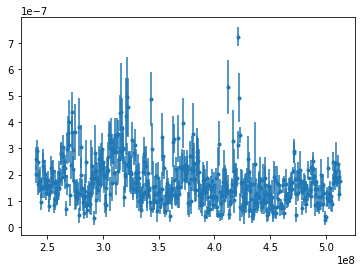

In [21]:
plt.errorbar(lc[1].data['START'],
         lc[1].data['FLUX_100_300000'], 
         yerr=lc[1].data['ERROR_100_300000'], fmt='.')
plt.show()

In [22]:
trueFvar = F_var(lc[1].data['FLUX_100_300000'],lc[1].data['ERROR_100_300000'])

In [23]:
masks = [np.random.choice([False, True], len(lc[1].data['FLUX_100_300000']), p=[0.25, 0.75]) for N in np.arange(5000)]
Fvars = np.array([(F_var(lc[1].data['FLUX_100_300000'][mask],lc[1].data['ERROR_100_300000'][mask])) for mask in masks])

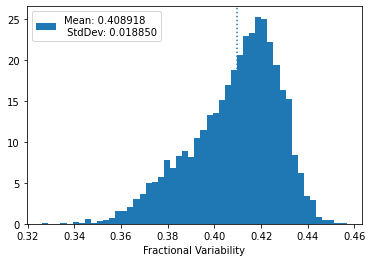

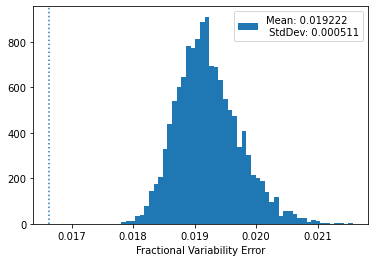

In [25]:
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,0].mean(),Fvars[:,0].std())
H = plt.hist(Fvars[:,0],bins=50, density=True, label=txt)
plt.xlabel('Fractional Variability')
plt.axvline(trueFvar[0], ls=":")
plt.legend()
plt.show()
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,1].mean(),Fvars[:,1].std())
plt.hist(Fvars[:,1],bins=50, density=True, label=txt)
plt.axvline(trueFvar[1], ls=":")
plt.legend()
plt.xlabel('Fractional Variability Error')
plt.show()

In [26]:
masks = [np.random.choice([False, True], len(lc[1].data['FLUX_100_300000']), p=[0.75, 0.25]) for N in np.arange(5000)]
Fvars = np.array([(F_var(lc[1].data['FLUX_100_300000'][mask],lc[1].data['ERROR_100_300000'][mask])) for mask in masks])

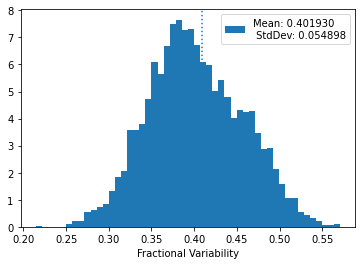

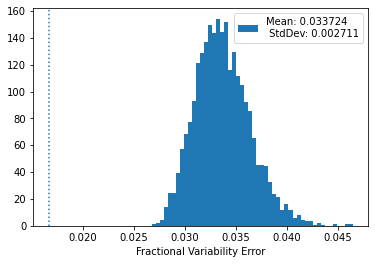

In [27]:
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,0].mean(),Fvars[:,0].std())
H = plt.hist(Fvars[:,0],bins=50, density=True, label=txt)
plt.xlabel('Fractional Variability')
plt.axvline(trueFvar[0], ls=":")
plt.legend()
plt.show()
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,1].mean(),Fvars[:,1].std())
plt.hist(Fvars[:,1],bins=50, density=True, label=txt)
plt.axvline(trueFvar[1], ls=":")
plt.legend()
plt.xlabel('Fractional Variability Error')
plt.show()

In this case, the Fractional Variability Error calculations are ok for the 75% case but not for the 25% case.  Let's do a scan.

In [28]:
def calcF(p,data,error):
    masks = [np.random.choice([False, True], len(data), p=[1-p, p]) for N in np.arange(5000)]    
    Fvars = np.array([(F_var(data[mask],error[mask])) for mask in masks])
    return p,Fvars[:,0].mean(),Fvars[:,0].std(),Fvars[:,1].mean(),Fvars[:,1].std()

In [29]:
Fvars = np.array([calcF(p,lc[1].data['FLUX_100_300000'],lc[1].data['ERROR_100_300000']) 
                  for p in np.linspace(0.2,0.9,10)])


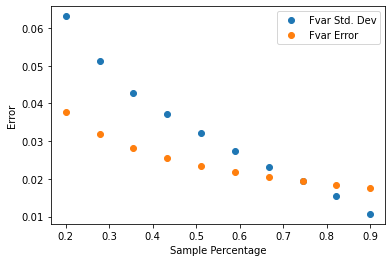

In [30]:
plt.plot(Fvars[:,0],Fvars[:,2],'o',label='Fvar Std. Dev')
plt.plot(Fvars[:,0],Fvars[:,3],'o',label='Fvar Error')
plt.xlabel('Sample Percentage')
plt.ylabel('Error')
plt.legend()
plt.show()

So, the error calculation is ok when you have good sampling but bad when you don't.  In fact, it probably over compensates when you have really good sampling.

### Possible modification

Let's try scaling the number of bins by the actual coverage of the light curve (N*bin_width/total_time).

In [31]:
def F_var_mod(data,error,width,tot_time):
    
    N = len(data)**2*(width/tot_time)
    sigma2 = np.mean(error**2)
    mean = np.mean(data)
        
    Fvar = np.sqrt((np.var(data) - sigma2) / mean**2)
    FvarErr = np.sqrt(((sigma2/(Fvar*mean**2))**2)/(2*N) + (np.sqrt(sigma2/N) / mean)**2)
    
    return Fvar, FvarErr

In [32]:
width = lc[1].data['START'][1] - lc[1].data['START'][0]
tot_time = lc[1].data['STOP'][-1] - lc[1].data['STOP'][0]


In [33]:
tot_time

273196800.0

In [34]:
trueFvar = F_var_mod(lc[1].data['FLUX_100_300000'],lc[1].data['ERROR_100_300000'], width, tot_time)
trueFvar

(0.4096348980819538, 0.016620650366817563)

In [35]:
masks = [np.random.choice([False, True], len(lc[1].data['FLUX_100_300000']), p=[0.25, 0.75]) for N in np.arange(5000)]
Fvars = np.array([(F_var_mod(lc[1].data['FLUX_100_300000'][mask],lc[1].data['ERROR_100_300000'][mask],width,tot_time)) 
                  for mask in masks])

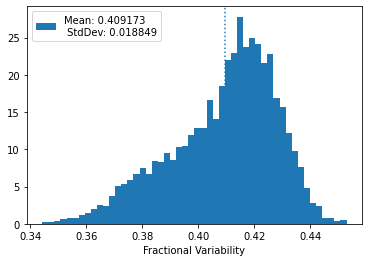

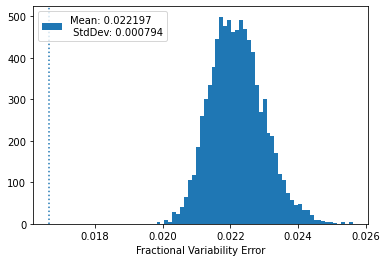

In [37]:
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,0].mean(),Fvars[:,0].std())
H = plt.hist(Fvars[:,0],bins=50, density=True, label=txt)
plt.xlabel('Fractional Variability')
plt.axvline(trueFvar[0], ls=":")
plt.legend()
plt.show()
txt = 'Mean: {:f}\n StdDev: {:f}'.format(Fvars[:,1].mean(),Fvars[:,1].std())
plt.hist(Fvars[:,1],bins=50, density=True, label=txt)
plt.axvline(trueFvar[1], ls=":")
plt.legend()
plt.xlabel('Fractional Variability Error')
plt.show()

In [38]:
def calcF_mod(p,data,error):
    masks = [np.random.choice([False, True], len(data), p=[1-p, p]) for N in np.arange(5000)]    
    Fvars = np.array([(F_var_mod(data[mask],error[mask],width,tot_time)) for mask in masks])
    return p,Fvars[:,0].mean(),Fvars[:,0].std(),Fvars[:,1].mean(),Fvars[:,1].std()

In [39]:
Fvars = np.array([calcF_mod(p,lc[1].data['FLUX_100_300000'],lc[1].data['ERROR_100_300000']) 
                  for p in np.linspace(0.2,0.9,10)])

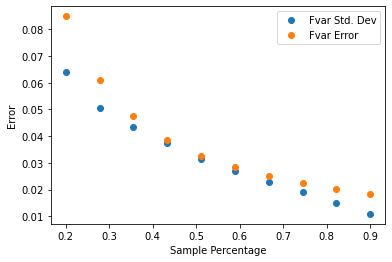

In [40]:
plt.plot(Fvars[:,0],Fvars[:,2],'o',label='Fvar Std. Dev')
plt.plot(Fvars[:,0],Fvars[:,3],'o',label='Fvar Error')
plt.xlabel('Sample Percentage')
plt.ylabel('Error')
plt.legend()
plt.show()

This looks much better for this source that is pretty uniform in behavior.  But what about our dear friend 3C 454.3...

In [41]:
lc = pyfits.open('3C454.3_604800.lc')

In [42]:
Fvars = np.array([calcF_mod(p,lc[1].data['FLUX_100_300000'],lc[1].data['ERROR_100_300000']) 
                  for p in np.linspace(0.2,0.9,10)])

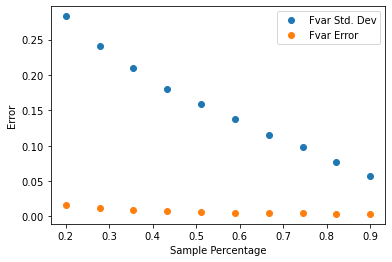

In [43]:
plt.plot(Fvars[:,0],Fvars[:,2],'o',label='Fvar Std. Dev')
plt.plot(Fvars[:,0],Fvars[:,3],'o',label='Fvar Error')
plt.xlabel('Sample Percentage')
plt.ylabel('Error')
plt.legend()
plt.show()

Still bad.  Actually, you never get a good handle on the erorr due to the way that this source behaves.  My hunch is that if you're looking at sources with large variations in flux as well as long periods of quiescence then you'll never get a handle on the error.  

### Todo
* Do a study of all of the Fermi light curves.
* How do you handle missing information.  My initial thought is to do some kind of Bayesian prior on how high the source can go and under what timescale.  This would need to be based on the user.  You could do some kind of monte-carlo to simulate a bunch of lightcurves based on this info to get a handle on the errror.

### From MNRAS 345, 1271 (2003)

> We demonstrate that $\sigma^2_{XS}$ (or similarly $F_{var}$) shows large changes from one part of the light curve to the next, even when the variability is produced by a stationary process. This limits the usefulness of these estimators for quantifying differences in variability amplitude between different sources or from epoch to epoch in one source. ... The excess variance can be useful for comparing the variability amplitudes of light curves in different energy bands from the same observation.

> As discussed above, when examining AGN light curves one should expect random changes in the mean and variance with time (between segments of a long observation or between observations taken at different epochs). This is true even if the measurement errors are zero, and is independent of the number of data points used (due to the weak non-stationarity). However, it is also possible that the un- derlying process responsible for the variability itself changes with time (e.g. the PSD changes), in which case the variability is non- stationary in a more meaningful sense – ‘strongly non-stationary’. Such changes in the variability process could provide an insight into the changing physical conditions in the nuclear regions. On the other hand, the random changes expected for a red noise process yield no such physical insight. The question thus arises: how does one tell, from a set of time series of the same source, whether they were produced by a strongly non-stationary process? In other words, is it possible to differentiate between differences in variance caused by real changes in the variability process (physical changes in the sys- tem) and random fluctuations expected from red noise (the random nature of the process)?